# Brain Tumor MRI Classification 

## Data Loading

In [1]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
100%|█████████████████████████████████████████| 149M/149M [09:16<00:00, 108kB/s]
100%|█████████████████████████████████████████| 149M/149M [09:16<00:00, 280kB/s]


In [2]:
import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/DeepLearning/DM/brain-tumor-mri-dataset.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/DeepLearning/DM')
zip_ref.close()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
classes = []
for sub_folder in os.listdir('/home/bhxveshhh/DeepLearning/DM/Training'):
    classes.append(sub_folder)
print(classes)

['meningioma', 'notumor', 'pituitary', 'glioma']


In [3]:
train_path='/home/bhxveshhh/DeepLearning/DM/Training'
test_path='/home/bhxveshhh/DeepLearning/DM/Testing'

In [4]:
img_list=[]
label_list=[]
for label in classes:
    for img_file in os.listdir(os.path.join(train_path, label)):
        img_list.append(os.path.join(train_path, label, img_file))
        label_list.append(label)

In [5]:
train_data = pd.DataFrame({'Image':img_list,'Label':label_list})
train_data

,Image,Label
0,/home/bhxveshhh/DeepLearning/DM/Training/menin...,meningioma
1,/home/bhxveshhh/DeepLearning/DM/Training/menin...,meningioma
2,/home/bhxveshhh/DeepLearning/DM/Training/menin...,meningioma
3,/home/bhxveshhh/DeepLearning/DM/Training/menin...,meningioma
4,/home/bhxveshhh/DeepLearning/DM/Training/menin...,meningioma
...,...,...
5707,/home/bhxveshhh/DeepLearning/DM/Training/gliom...,glioma
5708,/home/bhxveshhh/DeepLearning/DM/Training/gliom...,glioma
5709,/home/bhxveshhh/DeepLearning/DM/Training/gliom...,glioma
5710,/home/bhxveshhh/DeepLearning/DM/Training/gliom...,glioma


In [6]:
img_list=[]
label_list=[]
for label in classes:
    for img_file in os.listdir(os.path.join(test_path, label)):
        img_list.append(os.path.join(test_path, label, img_file))
        label_list.append(label)

In [7]:
test_data = pd.DataFrame({'Image':img_list,'Label':label_list})
test_data

,Image,Label
0,/home/bhxveshhh/DeepLearning/DM/Testing/mening...,meningioma
1,/home/bhxveshhh/DeepLearning/DM/Testing/mening...,meningioma
2,/home/bhxveshhh/DeepLearning/DM/Testing/mening...,meningioma
3,/home/bhxveshhh/DeepLearning/DM/Testing/mening...,meningioma
4,/home/bhxveshhh/DeepLearning/DM/Testing/mening...,meningioma
...,...,...
1306,/home/bhxveshhh/DeepLearning/DM/Testing/glioma...,glioma
1307,/home/bhxveshhh/DeepLearning/DM/Testing/glioma...,glioma
1308,/home/bhxveshhh/DeepLearning/DM/Testing/glioma...,glioma
1309,/home/bhxveshhh/DeepLearning/DM/Testing/glioma...,glioma


In [8]:
print(f'Train Data Shape: {train_data.shape}')
print(f'Test Data Shape: {test_data.shape}')

Train Data Shape: (5712, 2)
Test Data Shape: (1311, 2)


## Data Visualization

In [13]:
def Plot_Classes(BASE_URL, Rows=2, Columns=5):

    plt.figure(figsize=(25, 8))
    image_count = 1

    for directory in os.listdir(BASE_URL):
        if directory[0] != '.':
            directory_path = os.path.join(BASE_URL, directory)
            Max_Random = len(os.listdir(directory_path))
            Random_Number = np.random.randint(0, Max_Random)

            for i, file in enumerate(os.listdir(directory_path)):
                if i == Random_Number:
                    fig = plt.subplot(Rows, Columns, image_count)
                    image_count += 1

                    image_path = os.path.join(directory_path, file)
                    image = plt.imread(image_path)
                    plt.imshow(image)

                    plt.title(directory)
                    break

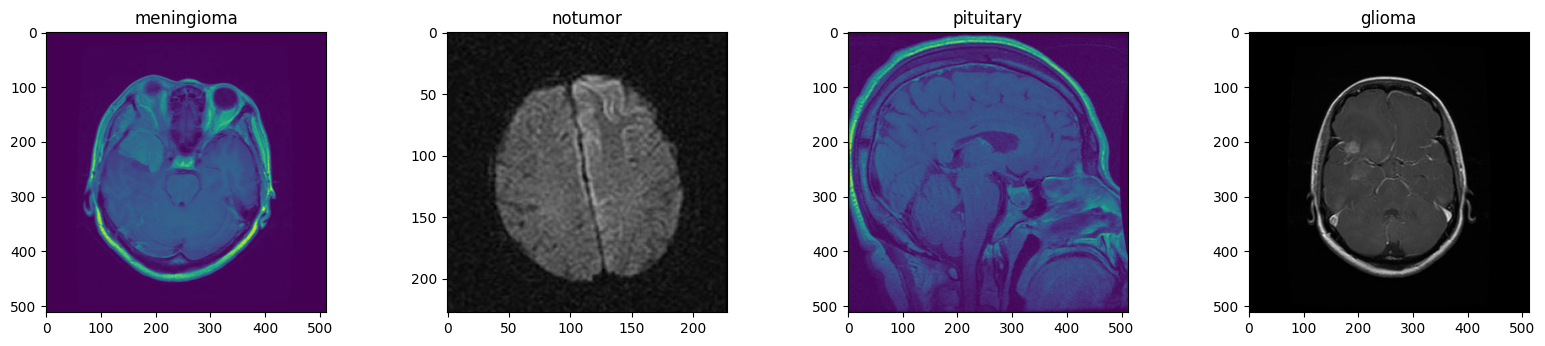

In [14]:
Plot_Classes(train_path)

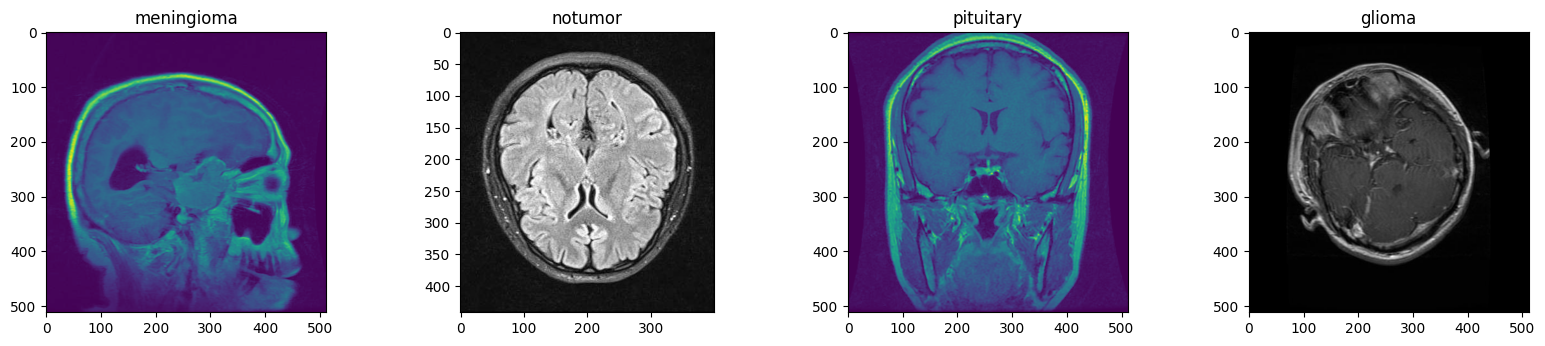

In [15]:
Plot_Classes(test_path)

In [16]:
train_data['Label'].value_counts()

Label
notumor       1595
pituitary     1457
meningioma    1339
glioma        1321
Name: count, dtype: int64

<Axes: xlabel='Label'>

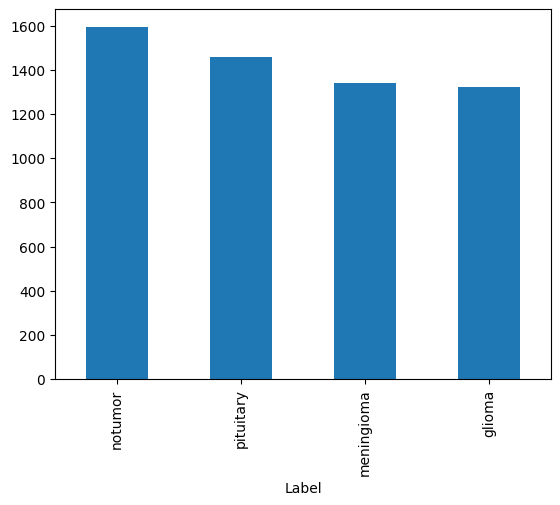

In [17]:
train_data['Label'].value_counts().plot(kind='bar')

In [18]:
test_data['Label'].value_counts()

Label
notumor       405
meningioma    306
pituitary     300
glioma        300
Name: count, dtype: int64

<Axes: xlabel='Label'>

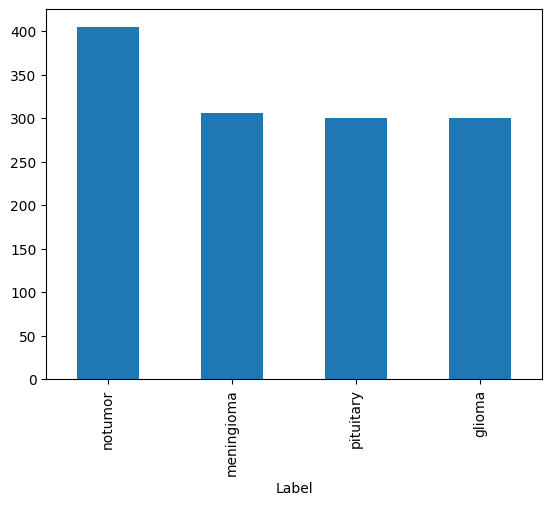

In [19]:
test_data['Label'].value_counts().plot(kind='bar')

## Data Preprocessing

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import load_img

2025-04-14 15:31:07.823105: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744624867.877720    2423 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744624867.895581    2423 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-14 15:31:08.022974: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
image_size = (150, 150)
batch_size = 32

In [11]:
# Data Augmentation


train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.15,
                                   rotation_range=10,
                                   brightness_range=(0.85, 1.15),
                                   width_shift_range=0.002,
                                   height_shift_range=0.002,
                                   shear_range=12.5,
                                   zoom_range=0,
                                   horizontal_flip=True,
                                   vertical_flip=False,
                                   fill_mode="nearest")

val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)

# Training data generator
train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=image_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    subset='training',
                                                    seed=0)

# Validation data generator
val_generator = val_datagen.flow_from_directory(train_path,
                                                target_size=image_size,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='validation',
                                                seed=0)

# Rescaling test data
test_datagen = ImageDataGenerator(rescale=1./255)


test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size=image_size,
                                                  batch_size=batch_size,
                                                  class_mode="categorical",
                                                  shuffle=False,
                                                  seed=0)

Found 4857 images belonging to 4 classes.


Found 855 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [12]:
# Function to viusalize how the ImageDataGenerator augments the data

def show_ImageDataGenerator(ImageDataGenerator, num_samples=5, figsize=(12, 12), save=False):

    augmented_samples = train_generator.__next__()
    images = augmented_samples[0][:num_samples]
    fig, axes = plt.subplots(1, num_samples, figsize=figsize)
    for i, ax in enumerate(axes):
        ax.imshow(images[i])
        ax.axis('off')

    plt.tight_layout()
    if save:
        plt.savefig('show_ImageDataGenerator.pdf')
    plt.show()

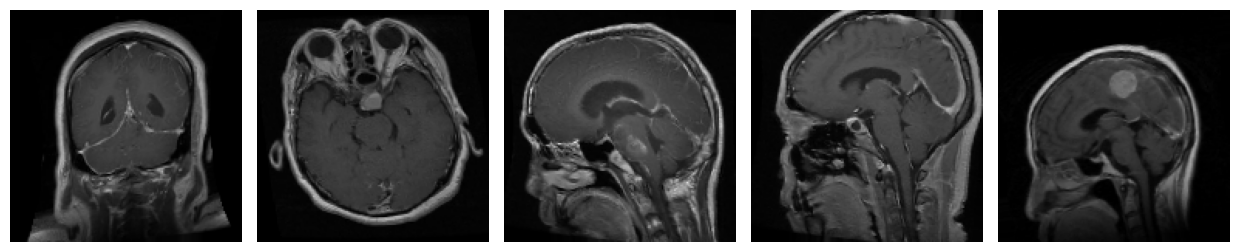

In [13]:
show_ImageDataGenerator(train_datagen, num_samples=5, figsize=(12.5, 8), save=False)

In [14]:
image_shape = (image_size[0], image_size[1], 3)

print(f'Image shape: {image_shape}')
print(f'Batch size: {batch_size}')
print(f'Number of Train batches: {len(train_generator)}')
print(f'Number of Validation batches: {len(val_generator)}')
print(f'Number of Testing batches: {len(test_generator)}')

Image shape: (150, 150, 3)
Batch size: 32
Number of Train batches: 152
Number of Validation batches: 27
Number of Testing batches: 41


In [15]:
# Mapping the labels

Classes_Map = train_generator.class_indices
num_classes = len(Classes_Map)
print("Number of Classes:", num_classes)
Classes_Map

Number of Classes: 4


{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

## Model Building

In [16]:
import tensorflow as tf
from tensorflow.keras.applications import *
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


# Example input
input_shape = (150, 150, 3)

### ResNet 101

In [29]:
base_model_resnet = ResNet101(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [ ]:
# Adding custom classification head

x = base_model_resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

In [32]:
model_resnet = Model(inputs=base_model_resnet.input, outputs=output)

In [33]:
model_resnet.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
history = model_resnet.fit(train_generator,epochs=10,validation_data=val_generator)

Epoch 1/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 220s 728ms/step - accuracy: 0.8101 - loss: 0.5030 - val_accuracy: 0.2982 - val_loss: 5.1971
Epoch 2/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 58s 372ms/step - accuracy: 0.9621 - loss: 0.1246 - val_accuracy: 0.3029 - val_loss: 1.9697
Epoch 3/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 81s 361ms/step - accuracy: 0.9725 - loss: 0.0890 - val_accuracy: 0.2807 - val_loss: 3.5837
Epoch 4/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 82s 366ms/step - accuracy: 0.9723 - loss: 0.0804 - val_accuracy: 0.2468 - val_loss: 6.1758
Epoch 5/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 57s 364ms/step - accuracy: 0.9763 - loss: 0.0716 - val_accuracy: 0.5719 - val_loss: 1.1369
Epoch 6/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 58s 370ms/step - accuracy: 0.9852 - loss: 0.0443 - val_accuracy: 0.7766 - val_loss: 0.5893
Epoch 7/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 56s 360ms/step - accuracy: 0.9904 - loss: 0.0302 - val_accuracy: 0.9158 - val_loss: 0.2741
Epoch 8/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 57s 365ms/step - accuracy: 0.9882 - loss: 

#### Model Evaluation

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
def plot_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.figure(figsize=(15,5))
  plt.style.use('ggplot')


  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, 'bo-' , label = "TrainL oss")
  plt.plot(epochs, val_loss, 'o-' , color='orange', label = "Val Loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()


  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, 'bo-' , label = "Train Acc")
  plt.plot(epochs, val_accuracy, 'o-' , color='orange' , label = "Val Acc")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()

  plt.style.use('default')

In [27]:
def CM(model, test_generator, categories):
    """
    Function to return the confusion matrix of a given CNN model.
    """
    from sklearn.metrics import confusion_matrix
    # Predictions on test dataset
    predictions = model.predict(test_generator)
    predicted_categories = np.argmax(predictions, axis=1)
    true_categories = test_generator.classes

    # Create a confusion matrix
    confusion_matrix_array = confusion_matrix(true_categories, predicted_categories)
    print(f"Classification Report for {model}:")
    print(classification_report(true_categories, predicted_categories, target_names=categories))

    return confusion_matrix_array


def calculate_metrics(confusion_matrix, categories):
    """
    Function to calculate important metrics for multi-classification problems.
    """
    # Calculating 4 different metrics
    precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
    recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
    f1_score = 2 * (precision * recall) / (precision + recall)
    accuracy = np.sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)

    # Printing the results based on each category
    for i, category in enumerate(categories):
        print(f"Class: {category.title()}")
        print(f"Precision: {precision[i]:.3f}")
        print(f"Recall: {recall[i]:.3f}")
        print(f"F1-Score: {f1_score[i]:.3f}\n")

    # Showing the total accuracy of the model
    print(f"\nAccuracy: {accuracy:.3f}")

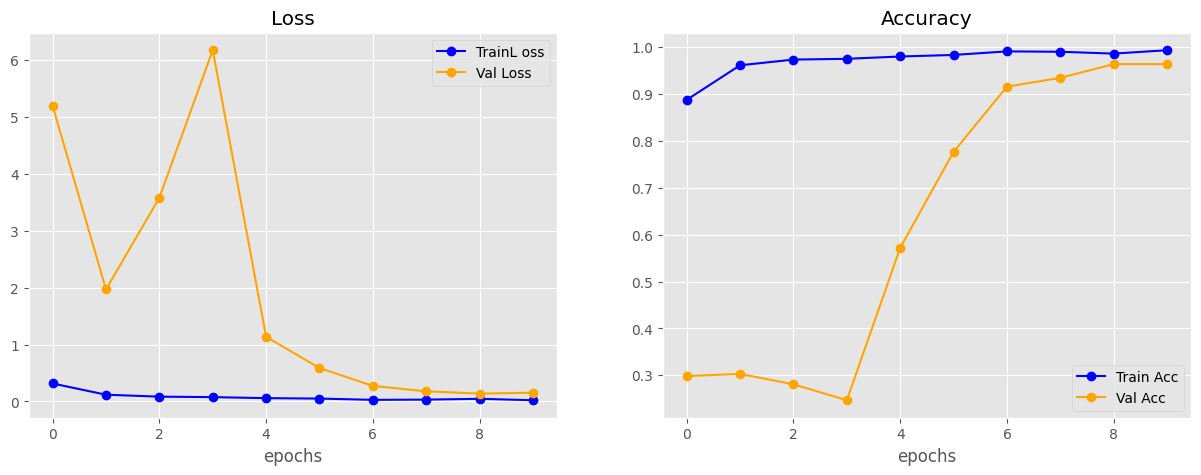

In [36]:
plot_curves(history)

In [37]:
loss, accuracy = model_resnet.evaluate(test_generator)
print(f"Test Loss: {loss:0.5f}")
print(f"Test Accuracy: {accuracy:0.5f}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 212ms/step - accuracy: 0.9830 - loss: 0.0666
Test Loss: 0.05583
Test Accuracy: 0.98474


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step
Classification Report for <Functional name=functional, built=True>:
              precision    recall  f1-score   support

  meningioma       0.99      1.00      1.00       300
      glioma       1.00      0.94      0.97       306
     notumor       0.99      1.00      0.99       405
   pituitary       0.96      1.00      0.98       300

    accuracy                           0.98      1311
   macro avg       0.98      0.98      0.98      1311
weighted avg       0.99      0.98      0.98      1311



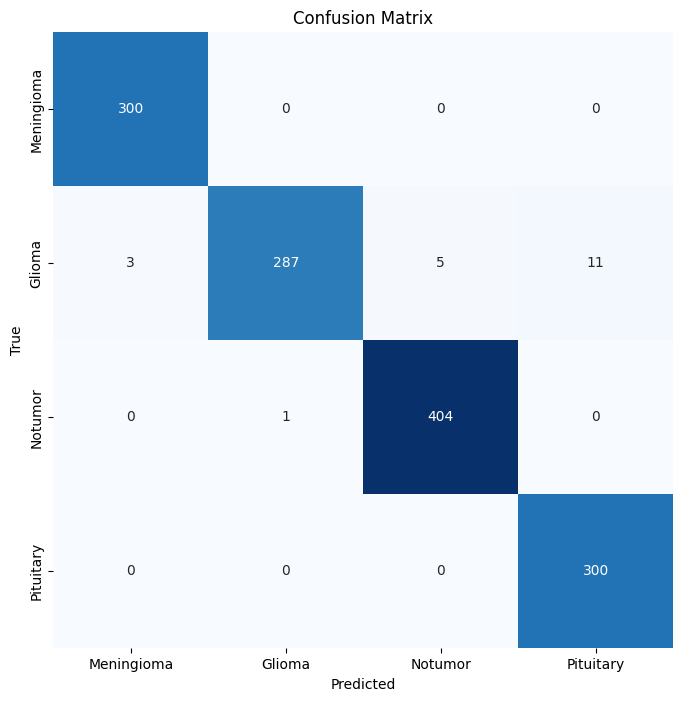

In [ ]:
confusion_matrix = CM(model=model_resnet, test_generator=test_generator, categories=classes)

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(4) + 0.5,
           labels=[name.title() for name in classes], ha='center')
plt.yticks(ticks=np.arange(4) + 0.5,
           labels=[name.title() for name in classes], va='center')
plt.show()

{'meningioma': 100.0, 'glioma': 0.0, 'notumor': 0.0, 'pituitary': 0.0}
{'meningioma': 100.0, 'glioma': 0.0, 'notumor': 0.0, 'pituitary': 0.0}
{'meningioma': 100.0, 'glioma': 0.0, 'notumor': 0.0, 'pituitary': 0.0}
{'meningioma': 100.0, 'glioma': 0.0, 'notumor': 0.0, 'pituitary': 0.0}
{'meningioma': 100.0, 'glioma': 0.0, 'notumor': 0.0, 'pituitary': 0.0}
{'meningioma': 99.865, 'glioma': 0.1, 'notumor': 0.022, 'pituitary': 0.012}
{'meningioma': 100.0, 'glioma': 0.0, 'notumor': 0.0, 'pituitary': 0.0}
{'meningioma': 100.0, 'glioma': 0.0, 'notumor': 0.0, 'pituitary': 0.0}
{'meningioma': 99.989, 'glioma': 0.0, 'notumor': 0.001, 'pituitary': 0.01}
{'meningioma': 100.0, 'glioma': 0.0, 'notumor': 0.0, 'pituitary': 0.0}


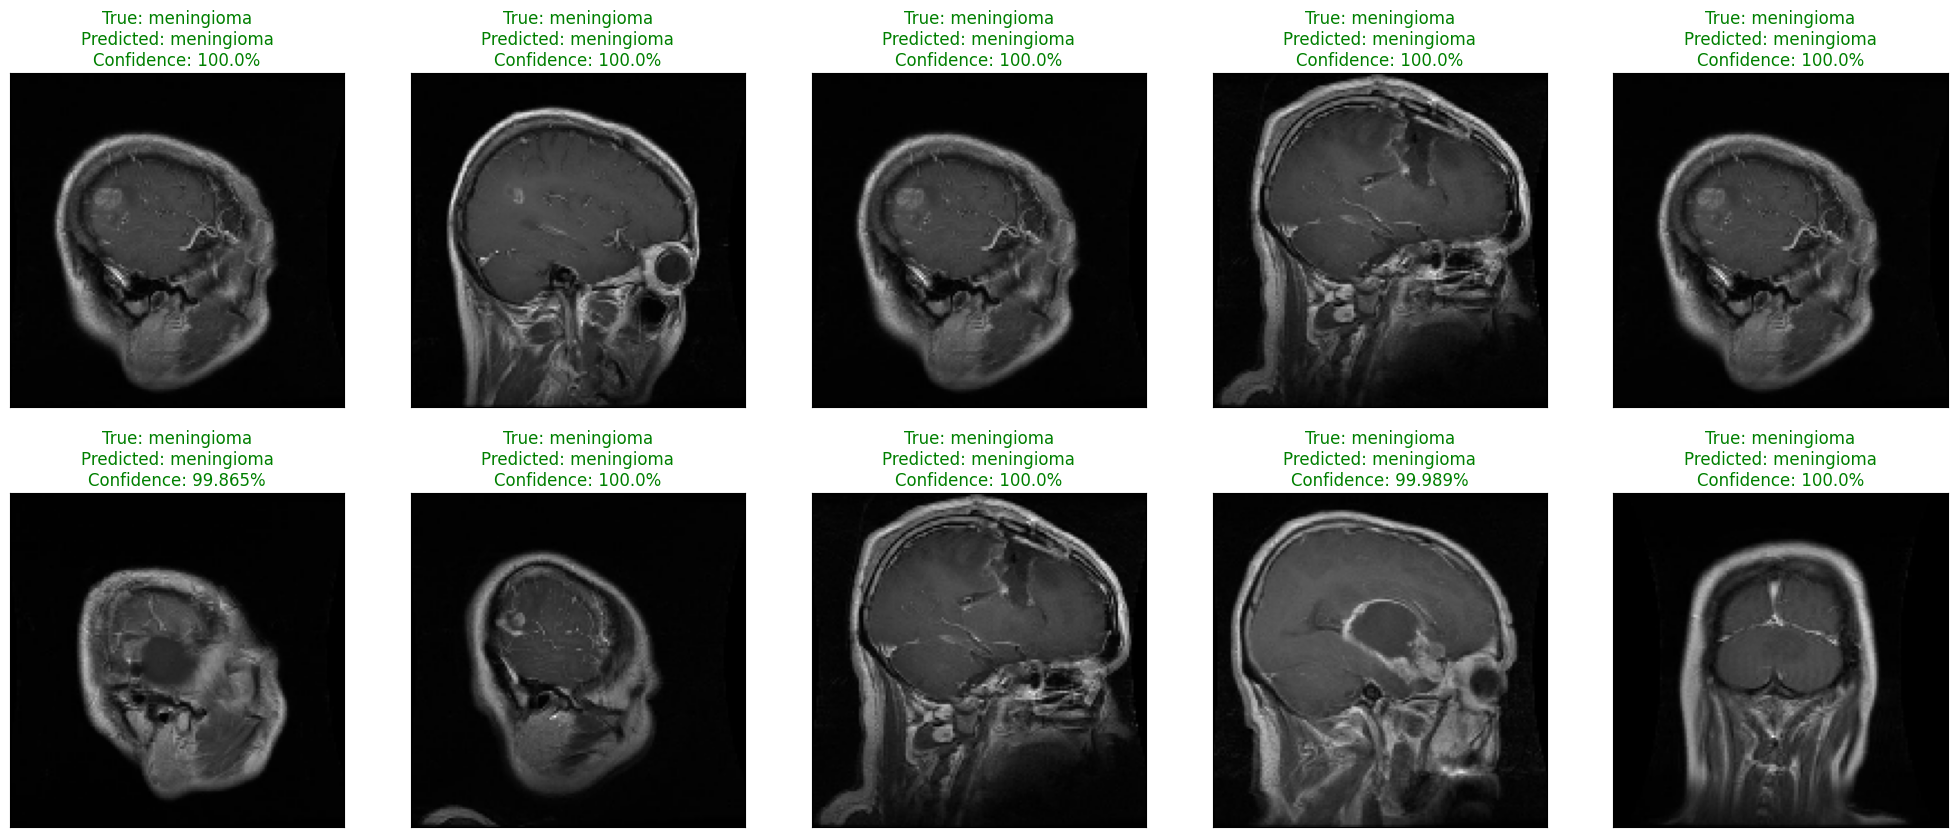

<Figure size 640x480 with 0 Axes>

In [44]:
Random_batch = np.random.randint(0, len(test_generator))
Random_Img_Index = np.random.randint(0, batch_size , 10)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    Random_Img = test_generator[Random_batch][0][Random_Img_Index[i]]
    Random_Img_Label = np.argmax(test_generator[Random_batch][1][Random_Img_Index[i]])
    Model_Predictions = model_resnet.predict( tf.expand_dims(Random_Img, axis=0) , verbose=0)
    Model_Highest_Prediction = np.argmax(Model_Predictions)
    Model_Predictions_Map = { c: round(p*100,3) for (c,p) in zip (classes, Model_Predictions.tolist()[0] ) }
    ax.imshow(Random_Img)

    Pred_Class = classes[Model_Highest_Prediction]
    if classes[Random_Img_Label] == Pred_Class:
      color = "green"
    else:
      color = "red"
    ax.set_title(f"True: {classes[Random_Img_Label]}\nPredicted: {Pred_Class}\nConfidence: {Model_Predictions_Map[Pred_Class]}%",
          color=color)
    print(Model_Predictions_Map)
plt.show()
plt.tight_layout()

### VGG16

In [30]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(train_generator, epochs=10, validation_data=val_generator)



I0000 00:00:1744566908.826447   10402 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4148 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 168s 3us/step
Epoch 1/10


I0000 00:00:1744567080.490173   12011 service.cc:148] XLA service 0x722adc004680 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744567080.490212   12011 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2025-04-13 23:28:00.566695: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1744567080.895418   12011 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-04-13 23:28:01.991179: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1899', 24 bytes spill stores, 24 bytes spill loads

2025-04-13 23:28:02.303241: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1899

  1/152 ━━━━━━━━━━━━━━━━━━━━ 51:54 21s/step - accuracy: 0.2812 - loss: 1.4623

I0000 00:00:1744567098.884664   12011 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


132/152 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - accuracy: 0.6439 - loss: 0.8436

2025-04-13 23:28:40.886917: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1899', 12 bytes spill stores, 16 bytes spill loads

2025-04-13 23:28:40.950738: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1899', 32 bytes spill stores, 32 bytes spill loads

2025-04-13 23:28:40.975009: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1899', 24 bytes spill stores, 24 bytes spill loads



152/152 ━━━━━━━━━━━━━━━━━━━━ 68s 310ms/step - accuracy: 0.6630 - loss: 0.8037 - val_accuracy: 0.7953 - val_loss: 0.5220
Epoch 2/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 25s 163ms/step - accuracy: 0.9164 - loss: 0.2277 - val_accuracy: 0.9029 - val_loss: 0.3243
Epoch 3/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 25s 163ms/step - accuracy: 0.9323 - loss: 0.1928 - val_accuracy: 0.8982 - val_loss: 0.3388
Epoch 4/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 25s 164ms/step - accuracy: 0.9563 - loss: 0.1261 - val_accuracy: 0.9368 - val_loss: 0.2258
Epoch 5/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 25s 164ms/step - accuracy: 0.9691 - loss: 0.0910 - val_accuracy: 0.9018 - val_loss: 0.2705
Epoch 6/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 25s 164ms/step - accuracy: 0.9798 - loss: 0.0674 - val_accuracy: 0.9158 - val_loss: 0.2693
Epoch 7/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 25s 164ms/step - accuracy: 0.9751 - loss: 0.0721 - val_accuracy: 0.9193 - val_loss: 0.3298
Epoch 8/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 25s 164ms/step - accuracy: 0.9803 - loss: 0.0533 - val

In [31]:
import matplotlib.pyplot as plt

def plot_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    epochs = range(len(loss))

    plt.figure(figsize=(15, 5))
    plt.style.use('ggplot')

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo-', label="Train Loss")
    plt.plot(epochs, val_loss, 'o-', color='orange', label="Val Loss")
    plt.title("Loss over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'bo-', label="Train Accuracy")
    plt.plot(epochs, val_accuracy, 'o-', color='orange', label="Val Accuracy")
    plt.title("Accuracy over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.style.use('default')
    plt.show()


In [32]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

def CM(model, test_generator, categories):
    predictions = model.predict(test_generator)
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = test_generator.classes

    # Confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    print("Classification Report:\n")
    print(classification_report(true_labels, predicted_labels, target_names=categories))

    return cm


In [33]:
def calculate_metrics(confusion_matrix, categories):
    precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
    recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
    f1_score = 2 * (precision * recall) / (precision + recall)
    accuracy = np.sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)

    for i, category in enumerate(categories):
        print(f"Class: {category.title()}")
        print(f"  Precision: {precision[i]:.3f}")
        print(f"  Recall:    {recall[i]:.3f}")
        print(f"  F1-Score:  {f1_score[i]:.3f}\n")

    print(f"Overall Accuracy: {accuracy:.3f}")


In [34]:
import seaborn as sns

def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.xticks(ticks=np.arange(len(classes)) + 0.5,
               labels=[cls.title() for cls in classes], ha='center')
    plt.yticks(ticks=np.arange(len(classes)) + 0.5,
               labels=[cls.title() for cls in classes], va='center')
    plt.show()


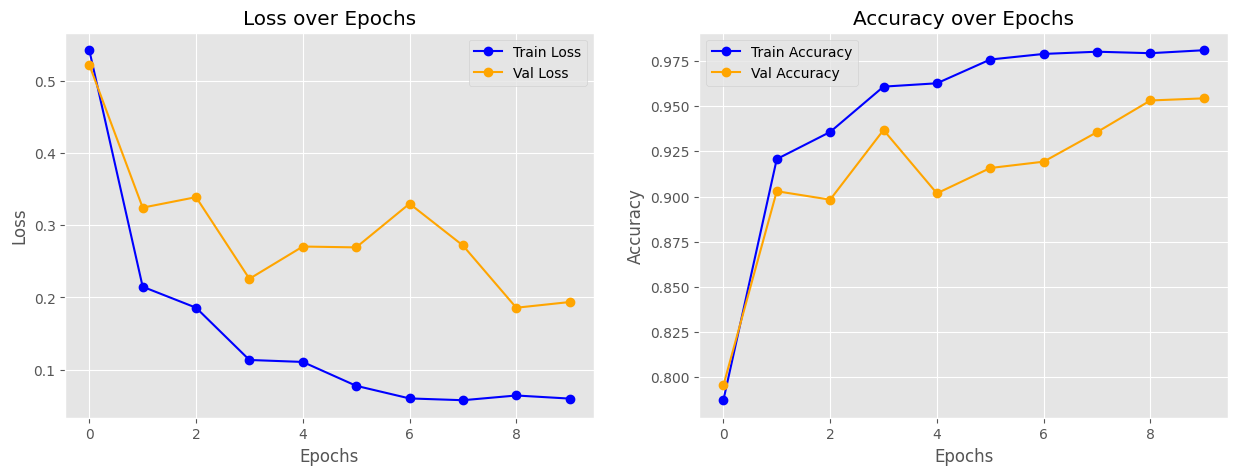

In [38]:
plot_curves(history)


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step
Classification Report:

              precision    recall  f1-score   support

      glioma       0.98      0.99      0.98       300
  meningioma       0.98      0.98      0.98       306
     notumor       1.00      1.00      1.00       405
   pituitary       0.99      0.98      0.99       300

    accuracy                           0.99      1311
   macro avg       0.99      0.99      0.99      1311
weighted avg       0.99      0.99      0.99      1311



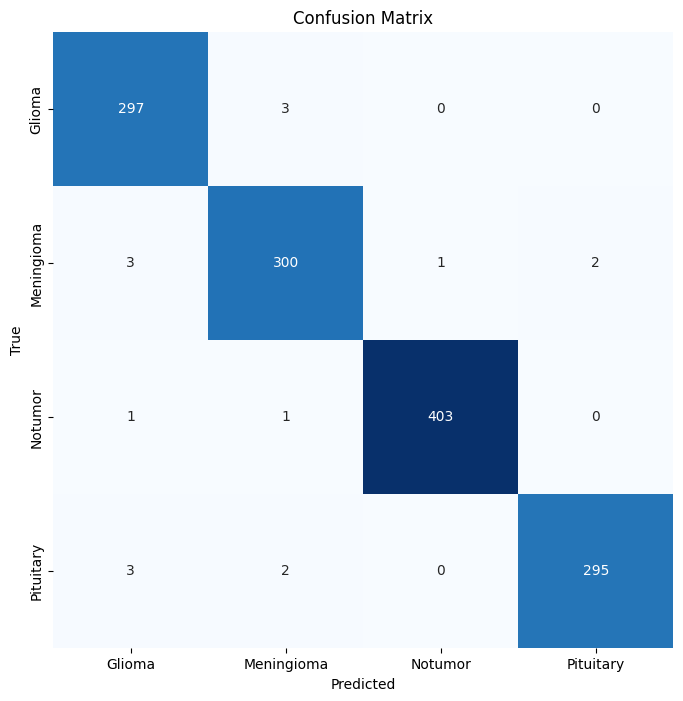

In [41]:
# Ensure the categories are in the correct order based on test_generator.class_indices
ordered_classes = [k for k, v in sorted(test_generator.class_indices.items(), key=lambda item: item[1])]

# Pass the correct ordered_classes to the CM function
confusion_matrix = CM(model=model, test_generator=test_generator, categories=ordered_classes)

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(len(ordered_classes)) + 0.5,
           labels=[name.title() for name in ordered_classes], ha='center')
plt.yticks(ticks=np.arange(len(ordered_classes)) + 0.5,
           labels=[name.title() for name in ordered_classes], va='center')
plt.show()

### VGG19

In [42]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(train_generator, epochs=10, validation_data=val_generator)



80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 100s 1us/step
Epoch 1/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 38s 216ms/step - accuracy: 0.5876 - loss: 0.9464 - val_accuracy: 0.7474 - val_loss: 0.5991
Epoch 2/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 30s 197ms/step - accuracy: 0.8808 - loss: 0.3245 - val_accuracy: 0.8035 - val_loss: 0.6877
Epoch 3/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 30s 198ms/step - accuracy: 0.9188 - loss: 0.2322 - val_accuracy: 0.8667 - val_loss: 0.3772
Epoch 4/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 30s 198ms/step - accuracy: 0.9569 - loss: 0.1323 - val_accuracy: 0.9158 - val_loss: 0.2655
Epoch 5/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 30s 199ms/step - accuracy: 0.9508 - loss: 0.1393 - val_accuracy: 0.9123 - val_loss: 0.3108
Epoch 6/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 30s 199ms/step - accuracy: 0.9376 - loss: 0.2014 - val_accuracy: 0.8959 - val_loss: 0.3455
Epoch 7/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 30s 199ms/step - accuracy: 0.9650 - loss: 0.0983 - val_accuracy: 0.9240 - val_loss: 0.2506
Epoch 8/10
152/152 ━━━━━━━━━━━

In [43]:
import matplotlib.pyplot as plt

def plot_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    epochs = range(len(loss))

    plt.figure(figsize=(15, 5))
    plt.style.use('ggplot')

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo-', label="Train Loss")
    plt.plot(epochs, val_loss, 'o-', color='orange', label="Val Loss")
    plt.title("Loss over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'bo-', label="Train Accuracy")
    plt.plot(epochs, val_accuracy, 'o-', color='orange', label="Val Accuracy")
    plt.title("Accuracy over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.style.use('default')
    plt.show()


In [44]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

def CM(model, test_generator, categories):
    predictions = model.predict(test_generator)
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = test_generator.classes

    # Confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    print("Classification Report:\n")
    print(classification_report(true_labels, predicted_labels, target_names=categories))

    return cm


In [45]:
def calculate_metrics(confusion_matrix, categories):
    precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
    recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
    f1_score = 2 * (precision * recall) / (precision + recall)
    accuracy = np.sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)

    for i, category in enumerate(categories):
        print(f"Class: {category.title()}")
        print(f"  Precision: {precision[i]:.3f}")
        print(f"  Recall:    {recall[i]:.3f}")
        print(f"  F1-Score:  {f1_score[i]:.3f}\n")

    print(f"Overall Accuracy: {accuracy:.3f}")


In [46]:
import seaborn as sns

def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.xticks(ticks=np.arange(len(classes)) + 0.5,
               labels=[cls.title() for cls in classes], ha='center')
    plt.yticks(ticks=np.arange(len(classes)) + 0.5,
               labels=[cls.title() for cls in classes], va='center')
    plt.show()


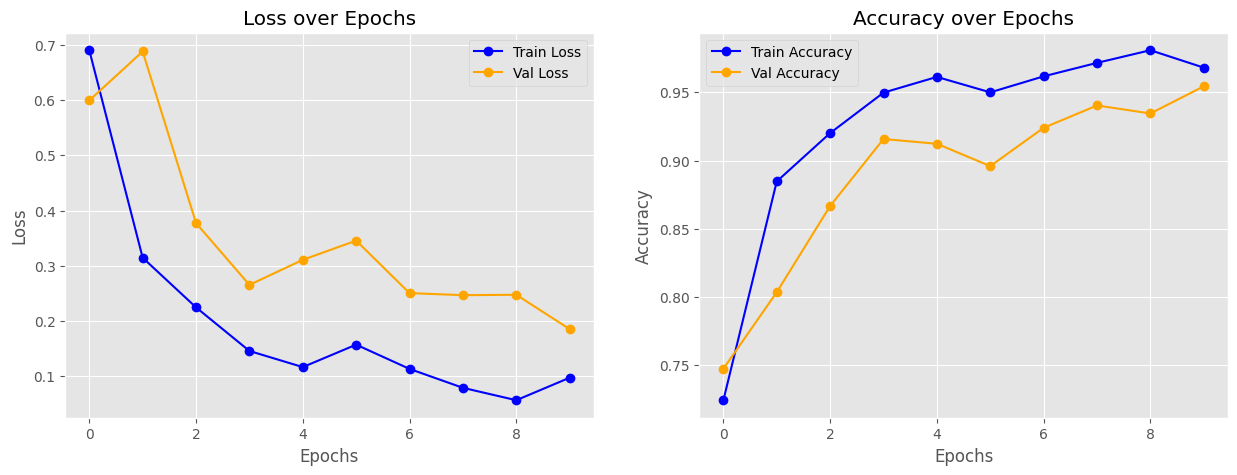

41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step
Classification Report:

              precision    recall  f1-score   support

      glioma       0.99      0.91      0.95       300
  meningioma       0.94      0.95      0.94       306
     notumor       0.99      1.00      0.99       405
   pituitary       0.94      1.00      0.97       300

    accuracy                           0.97      1311
   macro avg       0.96      0.96      0.96      1311
weighted avg       0.97      0.97      0.97      1311



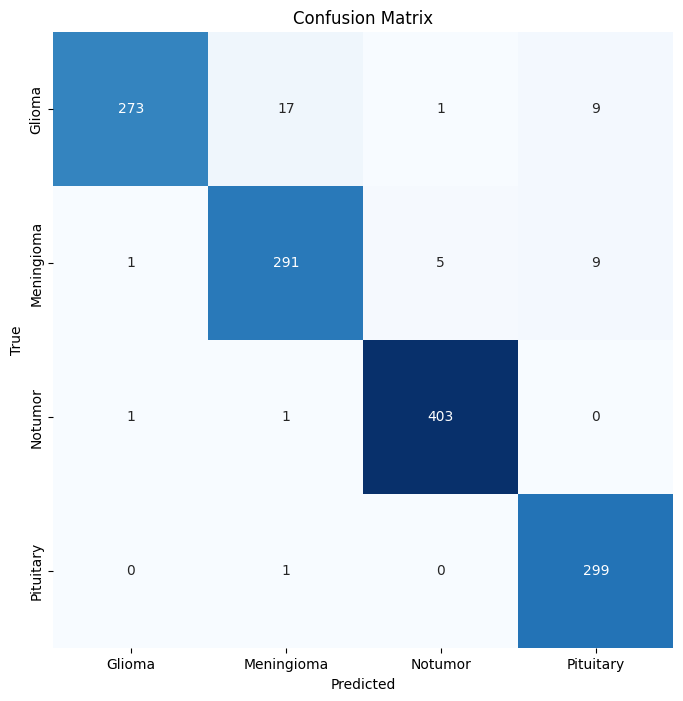

In [47]:
plot_curves(history)

# Ensure the categories are in the correct order based on test_generator.class_indices
ordered_classes = [k for k, v in sorted(test_generator.class_indices.items(), key=lambda item: item[1])]

# Pass the correct ordered_classes to the CM function
confusion_matrix = CM(model=model, test_generator=test_generator, categories=ordered_classes)

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(len(ordered_classes)) + 0.5,
           labels=[name.title() for name in ordered_classes], ha='center')
plt.yticks(ticks=np.arange(len(ordered_classes)) + 0.5,
           labels=[name.title() for name in ordered_classes], va='center')
plt.show()


### ResNet50

In [48]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(train_generator, epochs=10, validation_data=val_generator)



Epoch 1/10


2025-04-13 23:45:03.177336: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_14795_0', 112 bytes spill stores, 224 bytes spill loads

2025-04-13 23:45:03.225886: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_16648', 24 bytes spill stores, 24 bytes spill loads

2025-04-13 23:45:03.414011: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_14795', 220 bytes spill stores, 576 bytes spill loads

2025-04-13 23:45:03.710066: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_16648', 60 bytes spill stores, 64 bytes spill loads

2025-04-13 23:45:03.874162: I external/local_xla/x

 44/152 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step - accuracy: 0.6181 - loss: 0.9371

2025-04-13 23:45:26.466765: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_14795_0', 8 bytes spill stores, 8 bytes spill loads

2025-04-13 23:45:26.753433: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_16648', 12 bytes spill stores, 16 bytes spill loads

2025-04-13 23:45:26.867653: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_14795', 116 bytes spill stores, 116 bytes spill loads

2025-04-13 23:45:27.457518: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_16648', 24 bytes spill stores, 24 bytes spill loads

2025-04-13 23:45:27.482513: I external/local_xla/xla/s

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.7682 - loss: 0.5834

2025-04-13 23:45:56.547124: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1710_0', 8 bytes spill stores, 8 bytes spill loads

2025-04-13 23:45:56.818504: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1710', 80 bytes spill stores, 80 bytes spill loads



152/152 ━━━━━━━━━━━━━━━━━━━━ 78s 268ms/step - accuracy: 0.7689 - loss: 0.5819 - val_accuracy: 0.2538 - val_loss: 1.6931
Epoch 2/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 18s 117ms/step - accuracy: 0.9562 - loss: 0.1288 - val_accuracy: 0.2421 - val_loss: 1.7448
Epoch 3/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 18s 119ms/step - accuracy: 0.9656 - loss: 0.0949 - val_accuracy: 0.3345 - val_loss: 1.5826
Epoch 4/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 18s 121ms/step - accuracy: 0.9765 - loss: 0.0775 - val_accuracy: 0.4725 - val_loss: 1.2846
Epoch 5/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 19s 123ms/step - accuracy: 0.9835 - loss: 0.0469 - val_accuracy: 0.6760 - val_loss: 0.7773
Epoch 6/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 19s 124ms/step - accuracy: 0.9858 - loss: 0.0404 - val_accuracy: 0.7556 - val_loss: 0.5832
Epoch 7/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 19s 121ms/step - accuracy: 0.9899 - loss: 0.0306 - val_accuracy: 0.7556 - val_loss: 0.9458
Epoch 8/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 19s 122ms/step - accuracy: 0.9853 - loss: 0.0374 - val

In [49]:
import matplotlib.pyplot as plt

def plot_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    epochs = range(len(loss))

    plt.figure(figsize=(15, 5))
    plt.style.use('ggplot')

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo-', label="Train Loss")
    plt.plot(epochs, val_loss, 'o-', color='orange', label="Val Loss")
    plt.title("Loss over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'bo-', label="Train Accuracy")
    plt.plot(epochs, val_accuracy, 'o-', color='orange', label="Val Accuracy")
    plt.title("Accuracy over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.style.use('default')
    plt.show()


In [50]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

def CM(model, test_generator, categories):
    predictions = model.predict(test_generator)
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = test_generator.classes

    # Confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    print("Classification Report:\n")
    print(classification_report(true_labels, predicted_labels, target_names=categories))

    return cm


In [51]:
def calculate_metrics(confusion_matrix, categories):
    precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
    recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
    f1_score = 2 * (precision * recall) / (precision + recall)
    accuracy = np.sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)

    for i, category in enumerate(categories):
        print(f"Class: {category.title()}")
        print(f"  Precision: {precision[i]:.3f}")
        print(f"  Recall:    {recall[i]:.3f}")
        print(f"  F1-Score:  {f1_score[i]:.3f}\n")

    print(f"Overall Accuracy: {accuracy:.3f}")


In [52]:
import seaborn as sns

def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.xticks(ticks=np.arange(len(classes)) + 0.5,
               labels=[cls.title() for cls in classes], ha='center')
    plt.yticks(ticks=np.arange(len(classes)) + 0.5,
               labels=[cls.title() for cls in classes], va='center')
    plt.show()


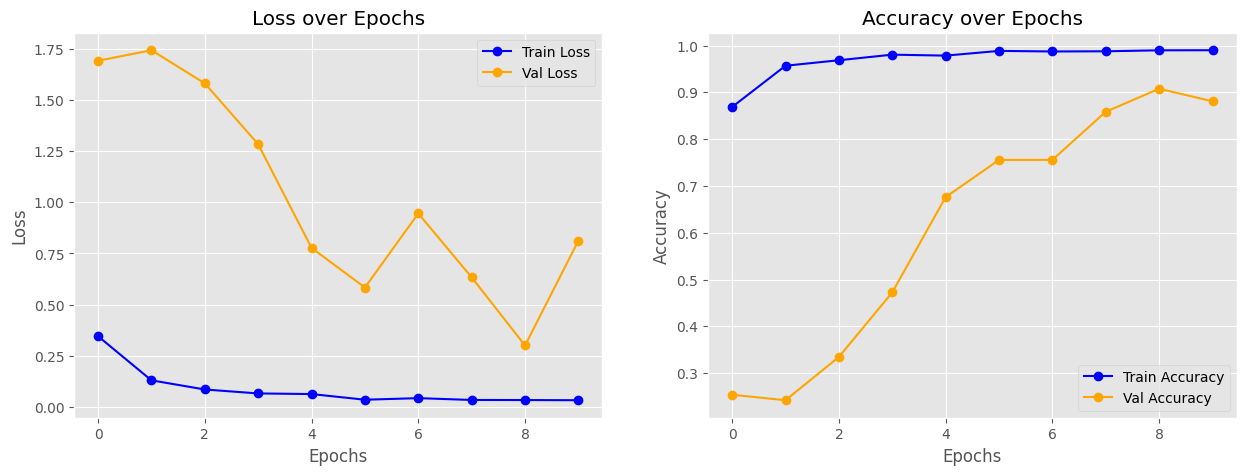

39/41 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

2025-04-13 23:48:51.273197: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1681_0', 8 bytes spill stores, 8 bytes spill loads

2025-04-13 23:48:51.530354: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1681', 208 bytes spill stores, 208 bytes spill loads



41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step
Classification Report:

              precision    recall  f1-score   support

      glioma       0.88      1.00      0.93       300
  meningioma       0.92      0.88      0.90       306
     notumor       1.00      0.92      0.96       405
   pituitary       0.97      0.98      0.98       300

    accuracy                           0.94      1311
   macro avg       0.94      0.94      0.94      1311
weighted avg       0.94      0.94      0.94      1311



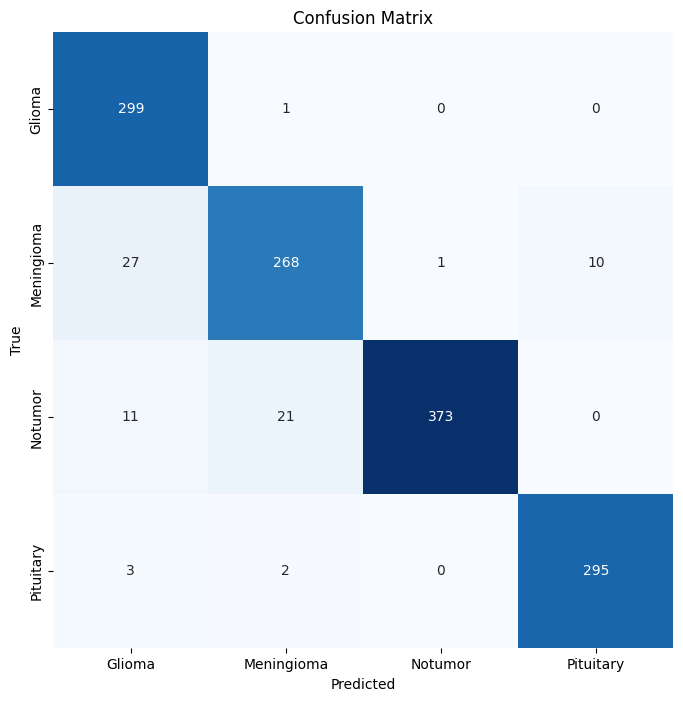

In [53]:
plot_curves(history)

# Ensure the categories are in the correct order based on test_generator.class_indices
ordered_classes = [k for k, v in sorted(test_generator.class_indices.items(), key=lambda item: item[1])]

# Pass the correct ordered_classes to the CM function
confusion_matrix = CM(model=model, test_generator=test_generator, categories=ordered_classes)

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(len(ordered_classes)) + 0.5,
           labels=[name.title() for name in ordered_classes], ha='center')
plt.yticks(ticks=np.arange(len(ordered_classes)) + 0.5,
           labels=[name.title() for name in ordered_classes], va='center')
plt.show()


### ResNet151

In [55]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(train_generator, epochs=10, validation_data=val_generator)



Epoch 1/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 62s 221ms/step - accuracy: 0.7674 - loss: 0.5991 - val_accuracy: 0.2772 - val_loss: 1.6186
Epoch 2/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 19s 122ms/step - accuracy: 0.9535 - loss: 0.1387 - val_accuracy: 0.3509 - val_loss: 1.7120
Epoch 3/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 18s 120ms/step - accuracy: 0.9736 - loss: 0.0756 - val_accuracy: 0.3181 - val_loss: 1.7292
Epoch 4/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 18s 120ms/step - accuracy: 0.9748 - loss: 0.0613 - val_accuracy: 0.2982 - val_loss: 2.1771
Epoch 5/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 18s 120ms/step - accuracy: 0.9815 - loss: 0.0476 - val_accuracy: 0.4620 - val_loss: 1.9612
Epoch 6/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 19s 123ms/step - accuracy: 0.9883 - loss: 0.0378 - val_accuracy: 0.5240 - val_loss: 2.0213
Epoch 7/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 19s 123ms/step - accuracy: 0.9892 - loss: 0.0298 - val_accuracy: 0.8749 - val_loss: 0.4008
Epoch 8/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 19s 123ms/step - accuracy: 0.9907 - loss: 0

In [56]:
import matplotlib.pyplot as plt

def plot_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    epochs = range(len(loss))

    plt.figure(figsize=(15, 5))
    plt.style.use('ggplot')

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo-', label="Train Loss")
    plt.plot(epochs, val_loss, 'o-', color='orange', label="Val Loss")
    plt.title("Loss over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'bo-', label="Train Accuracy")
    plt.plot(epochs, val_accuracy, 'o-', color='orange', label="Val Accuracy")
    plt.title("Accuracy over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.style.use('default')
    plt.show()


In [57]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

def CM(model, test_generator, categories):
    predictions = model.predict(test_generator)
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = test_generator.classes

    # Confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    print("Classification Report:\n")
    print(classification_report(true_labels, predicted_labels, target_names=categories))

    return cm


In [58]:
def calculate_metrics(confusion_matrix, categories):
    precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
    recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
    f1_score = 2 * (precision * recall) / (precision + recall)
    accuracy = np.sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)

    for i, category in enumerate(categories):
        print(f"Class: {category.title()}")
        print(f"  Precision: {precision[i]:.3f}")
        print(f"  Recall:    {recall[i]:.3f}")
        print(f"  F1-Score:  {f1_score[i]:.3f}\n")

    print(f"Overall Accuracy: {accuracy:.3f}")


In [59]:
import seaborn as sns

def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.xticks(ticks=np.arange(len(classes)) + 0.5,
               labels=[cls.title() for cls in classes], ha='center')
    plt.yticks(ticks=np.arange(len(classes)) + 0.5,
               labels=[cls.title() for cls in classes], va='center')
    plt.show()


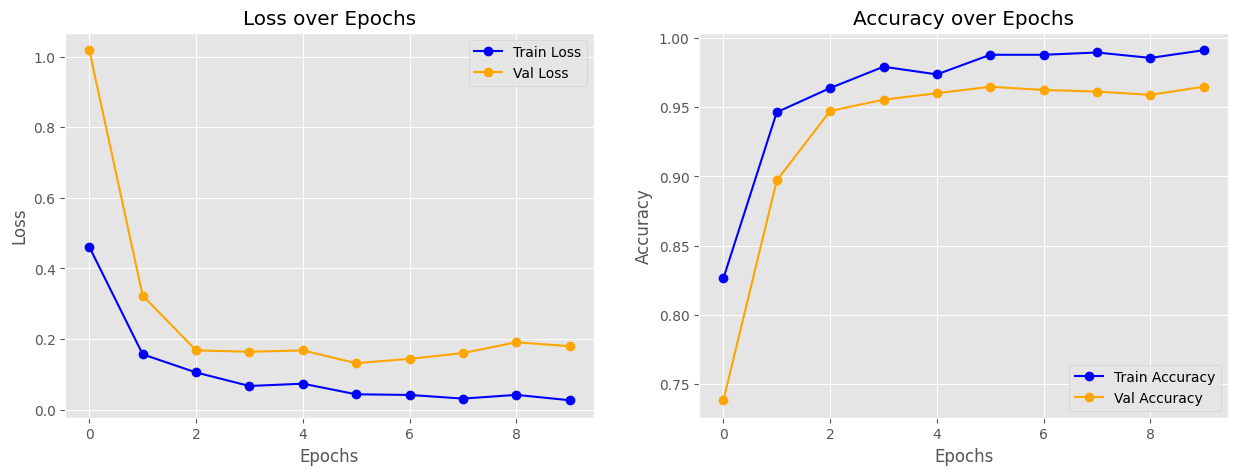

In [70]:
plot_curves(history)

### InceptionV3

In [62]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(train_generator, epochs=10, validation_data=val_generator)



Epoch 1/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 102s 353ms/step - accuracy: 0.7064 - loss: 0.7337 - val_accuracy: 0.7380 - val_loss: 1.0185
Epoch 2/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 18s 115ms/step - accuracy: 0.9424 - loss: 0.1682 - val_accuracy: 0.8971 - val_loss: 0.3232
Epoch 3/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 18s 116ms/step - accuracy: 0.9660 - loss: 0.1007 - val_accuracy: 0.9474 - val_loss: 0.1681
Epoch 4/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 18s 115ms/step - accuracy: 0.9828 - loss: 0.0598 - val_accuracy: 0.9556 - val_loss: 0.1640
Epoch 5/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 18s 116ms/step - accuracy: 0.9748 - loss: 0.0707 - val_accuracy: 0.9602 - val_loss: 0.1679
Epoch 6/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 18s 117ms/step - accuracy: 0.9895 - loss: 0.0415 - val_accuracy: 0.9649 - val_loss: 0.1316
Epoch 7/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 18s 118ms/step - accuracy: 0.9880 - loss: 0.0400 - val_accuracy: 0.9626 - val_loss: 0.1439
Epoch 8/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 18s 117ms/step - accuracy: 0.9870 - loss: 

In [63]:
import matplotlib.pyplot as plt

def plot_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    epochs = range(len(loss))

    plt.figure(figsize=(15, 5))
    plt.style.use('ggplot')

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo-', label="Train Loss")
    plt.plot(epochs, val_loss, 'o-', color='orange', label="Val Loss")
    plt.title("Loss over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'bo-', label="Train Accuracy")
    plt.plot(epochs, val_accuracy, 'o-', color='orange', label="Val Accuracy")
    plt.title("Accuracy over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.style.use('default')
    plt.show()


In [64]:
def calculate_metrics(confusion_matrix, categories):
    precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
    recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
    f1_score = 2 * (precision * recall) / (precision + recall)
    accuracy = np.sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)

    for i, category in enumerate(categories):
        print(f"Class: {category.title()}")
        print(f"  Precision: {precision[i]:.3f}")
        print(f"  Recall:    {recall[i]:.3f}")
        print(f"  F1-Score:  {f1_score[i]:.3f}\n")

    print(f"Overall Accuracy: {accuracy:.3f}")


In [65]:
def calculate_metrics(confusion_matrix, categories):
    precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
    recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
    f1_score = 2 * (precision * recall) / (precision + recall)
    accuracy = np.sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)

    for i, category in enumerate(categories):
        print(f"Class: {category.title()}")
        print(f"  Precision: {precision[i]:.3f}")
        print(f"  Recall:    {recall[i]:.3f}")
        print(f"  F1-Score:  {f1_score[i]:.3f}\n")

    print(f"Overall Accuracy: {accuracy:.3f}")


In [66]:
import seaborn as sns

def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.xticks(ticks=np.arange(len(classes)) + 0.5,
               labels=[cls.title() for cls in classes], ha='center')
    plt.yticks(ticks=np.arange(len(classes)) + 0.5,
               labels=[cls.title() for cls in classes], va='center')
    plt.show()


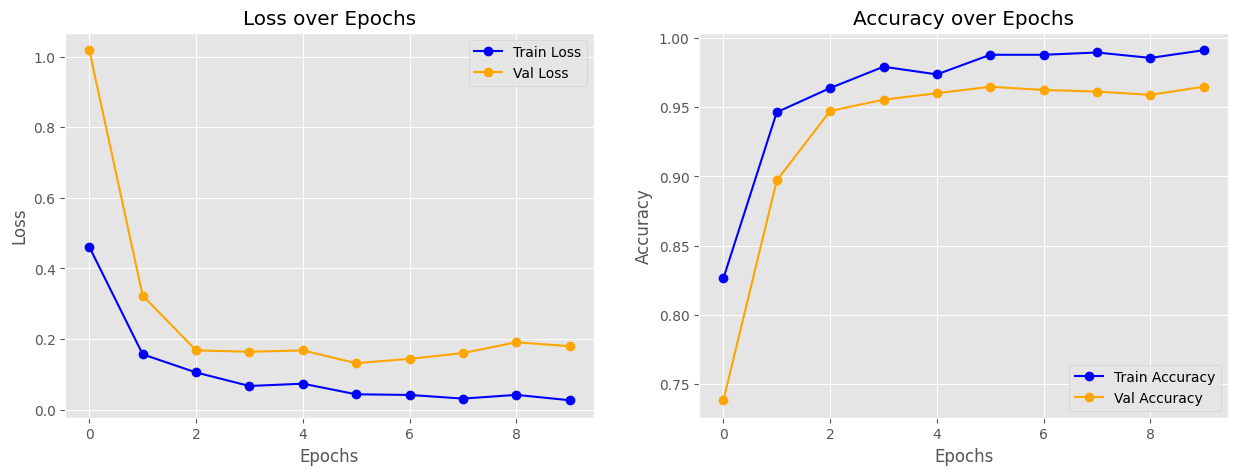

41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 199ms/step
Classification Report:

              precision    recall  f1-score   support

      glioma       1.00      0.96      0.98       300
  meningioma       0.95      0.90      0.92       306
     notumor       0.93      1.00      0.96       405
   pituitary       0.98      0.99      0.99       300

    accuracy                           0.96      1311
   macro avg       0.97      0.96      0.96      1311
weighted avg       0.96      0.96      0.96      1311



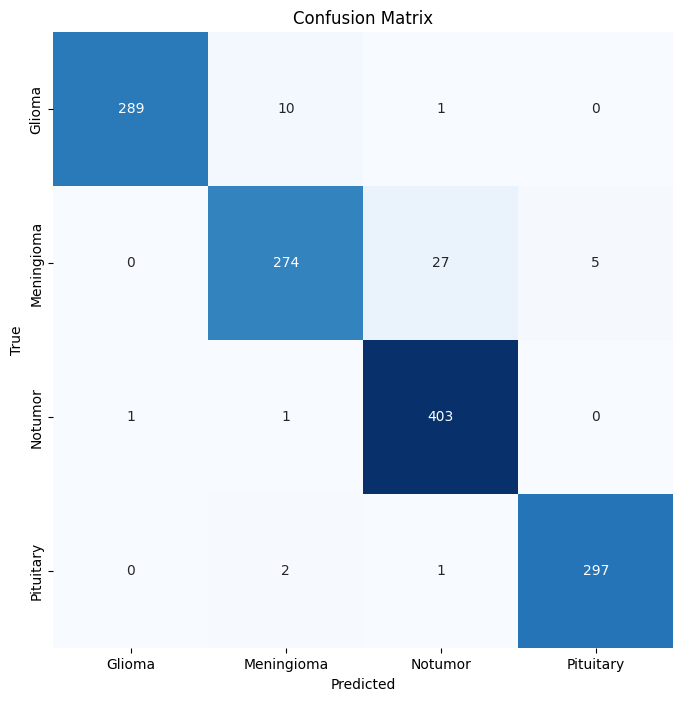

In [67]:
plot_curves(history)

# Ensure the categories are in the correct order based on test_generator.class_indices
ordered_classes = [k for k, v in sorted(test_generator.class_indices.items(), key=lambda item: item[1])]

# Pass the correct ordered_classes to the CM function
confusion_matrix = CM(model=model, test_generator=test_generator, categories=ordered_classes)

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(len(ordered_classes)) + 0.5,
           labels=[name.title() for name in ordered_classes], ha='center')
plt.yticks(ticks=np.arange(len(ordered_classes)) + 0.5,
           labels=[name.title() for name in ordered_classes], va='center')
plt.show()


### InceptionResNetV2

In [17]:
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=input_shape)


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(train_generator, epochs=10, validation_data=val_generator)



I0000 00:00:1744624903.871470    2423 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4148 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Epoch 1/10


I0000 00:00:1744624956.025765    2807 service.cc:148] XLA service 0x7277dc003600 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744624956.025790    2807 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2025-04-14 15:32:37.924872: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1744624964.282716    2807 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-04-14 15:32:49.595102: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_52550', 16 bytes spill stores, 16 bytes spill loads

2025-04-14 15:32:49.786662: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_525

 56/152 ━━━━━━━━━━━━━━━━━━━━ 14s 147ms/step - accuracy: 0.6019 - loss: 0.9601

2025-04-14 15:33:40.712628: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_52550_0', 8 bytes spill stores, 8 bytes spill loads

2025-04-14 15:33:40.714420: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_52550', 16 bytes spill stores, 16 bytes spill loads

2025-04-14 15:33:41.058775: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_52550_0', 344 bytes spill stores, 588 bytes spill loads

2025-04-14 15:33:41.101020: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_52550', 108 bytes spill stores, 108 bytes spill loads

2025-04-14 15:33:41.841440: I external/local_xla/x

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - accuracy: 0.7449 - loss: 0.6413

2025-04-14 15:34:34.203558: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_5390_0', 344 bytes spill stores, 588 bytes spill loads

2025-04-14 15:34:34.232349: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_5390_0', 8 bytes spill stores, 8 bytes spill loads

2025-04-14 15:34:34.261122: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_5390', 80 bytes spill stores, 80 bytes spill loads

2025-04-14 15:34:34.333318: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_5390', 16 bytes spill stores, 16 bytes spill loads



152/152 ━━━━━━━━━━━━━━━━━━━━ 172s 513ms/step - accuracy: 0.7457 - loss: 0.6394 - val_accuracy: 0.8690 - val_loss: 0.3635
Epoch 2/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 24s 158ms/step - accuracy: 0.9622 - loss: 0.1008 - val_accuracy: 0.9205 - val_loss: 0.2791
Epoch 3/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 24s 158ms/step - accuracy: 0.9788 - loss: 0.0555 - val_accuracy: 0.9497 - val_loss: 0.1863
Epoch 4/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 24s 158ms/step - accuracy: 0.9856 - loss: 0.0404 - val_accuracy: 0.9579 - val_loss: 0.1923
Epoch 5/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 24s 159ms/step - accuracy: 0.9900 - loss: 0.0287 - val_accuracy: 0.9637 - val_loss: 0.2041
Epoch 6/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 24s 159ms/step - accuracy: 0.9901 - loss: 0.0242 - val_accuracy: 0.9661 - val_loss: 0.1867
Epoch 7/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 24s 160ms/step - accuracy: 0.9904 - loss: 0.0317 - val_accuracy: 0.9544 - val_loss: 0.2069
Epoch 8/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 24s 159ms/step - accuracy: 0.9947 - loss: 0.0178 - va

In [18]:
import matplotlib.pyplot as plt

def plot_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    epochs = range(len(loss))

    plt.figure(figsize=(15, 5))
    plt.style.use('ggplot')

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo-', label="Train Loss")
    plt.plot(epochs, val_loss, 'o-', color='orange', label="Val Loss")
    plt.title("Loss over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'bo-', label="Train Accuracy")
    plt.plot(epochs, val_accuracy, 'o-', color='orange', label="Val Accuracy")
    plt.title("Accuracy over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.style.use('default')
    plt.show()


In [19]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

def CM(model, test_generator, categories):
    predictions = model.predict(test_generator)
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = test_generator.classes

    # Confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    print("Classification Report:\n")
    print(classification_report(true_labels, predicted_labels, target_names=categories))

    return cm


In [20]:
def calculate_metrics(confusion_matrix, categories):
    precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
    recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
    f1_score = 2 * (precision * recall) / (precision + recall)
    accuracy = np.sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)

    for i, category in enumerate(categories):
        print(f"Class: {category.title()}")
        print(f"  Precision: {precision[i]:.3f}")
        print(f"  Recall:    {recall[i]:.3f}")
        print(f"  F1-Score:  {f1_score[i]:.3f}\n")

    print(f"Overall Accuracy: {accuracy:.3f}")


In [21]:
import seaborn as sns

def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.xticks(ticks=np.arange(len(classes)) + 0.5,
               labels=[cls.title() for cls in classes], ha='center')
    plt.yticks(ticks=np.arange(len(classes)) + 0.5,
               labels=[cls.title() for cls in classes], va='center')
    plt.show()


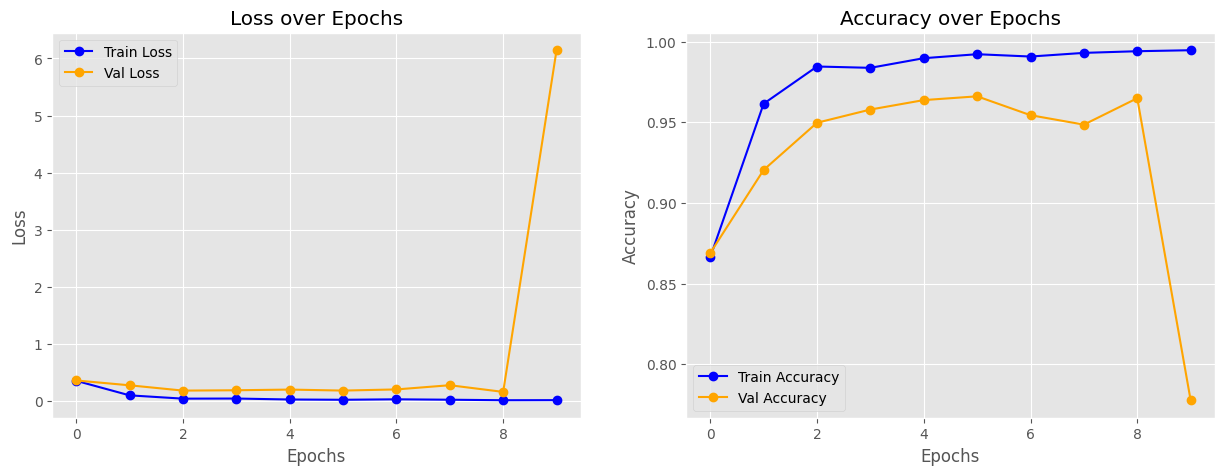

39/41 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step

2025-04-14 15:38:30.620518: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_5361_0', 8 bytes spill stores, 8 bytes spill loads

2025-04-14 15:38:30.883471: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_5361', 16 bytes spill stores, 16 bytes spill loads

2025-04-14 15:38:31.032980: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_5361_0', 344 bytes spill stores, 588 bytes spill loads

2025-04-14 15:38:31.289732: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_5361', 208 bytes spill stores, 208 bytes spill loads



41/41 ━━━━━━━━━━━━━━━━━━━━ 19s 311ms/step
Classification Report:

              precision    recall  f1-score   support

      glioma       0.76      0.89      0.82       300
  meningioma       0.70      0.80      0.75       306
     notumor       0.99      0.92      0.95       405
   pituitary       0.98      0.77      0.87       300

    accuracy                           0.85      1311
   macro avg       0.86      0.85      0.85      1311
weighted avg       0.87      0.85      0.86      1311



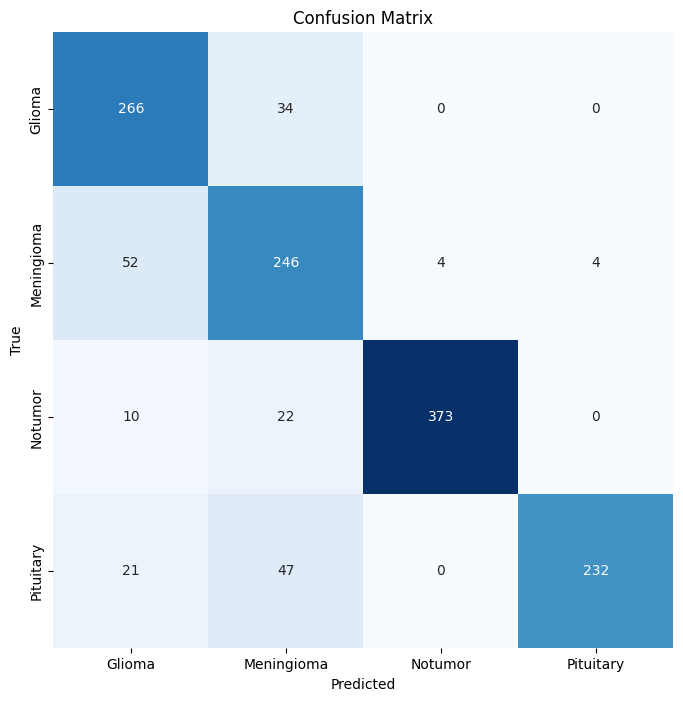

In [22]:
plot_curves(history)

# Ensure the categories are in the correct order based on test_generator.class_indices
ordered_classes = [k for k, v in sorted(test_generator.class_indices.items(), key=lambda item: item[1])]

# Pass the correct ordered_classes to the CM function
confusion_matrix = CM(model=model, test_generator=test_generator, categories=ordered_classes)

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(len(ordered_classes)) + 0.5,
           labels=[name.title() for name in ordered_classes], ha='center')
plt.yticks(ticks=np.arange(len(ordered_classes)) + 0.5,
           labels=[name.title() for name in ordered_classes], va='center')
plt.show()


### MobileNetV2

In [23]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(train_generator, epochs=10, validation_data=val_generator)



Epoch 1/10


2025-04-14 15:38:54.949649: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_7720', 16 bytes spill stores, 16 bytes spill loads

2025-04-14 15:38:55.203385: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_14640', 60 bytes spill stores, 64 bytes spill loads

2025-04-14 15:38:55.395999: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_7720', 228 bytes spill stores, 228 bytes spill loads

2025-04-14 15:38:55.627420: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_7720_0', 112 bytes spill stores, 144 bytes spill loads

2025-04-14 15:38:55.808136: I external/local_xla/xla/

105/152 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.6634 - loss: 0.8370

2025-04-14 15:39:22.539434: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_7720', 16 bytes spill stores, 16 bytes spill loads

2025-04-14 15:39:22.722739: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_7720_0', 344 bytes spill stores, 520 bytes spill loads

2025-04-14 15:39:23.062810: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_7720', 120 bytes spill stores, 120 bytes spill loads

2025-04-14 15:39:23.104717: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_14640', 12 bytes spill stores, 16 bytes spill loads

2025-04-14 15:39:23.276605: I external/local_xla/xla/

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.7088 - loss: 0.7302

2025-04-14 15:39:43.918029: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1181_0', 344 bytes spill stores, 520 bytes spill loads

2025-04-14 15:39:43.920908: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1181', 16 bytes spill stores, 16 bytes spill loads

2025-04-14 15:39:44.056646: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1181', 88 bytes spill stores, 88 bytes spill loads



152/152 ━━━━━━━━━━━━━━━━━━━━ 69s 252ms/step - accuracy: 0.7096 - loss: 0.7284 - val_accuracy: 0.4643 - val_loss: 2.0971
Epoch 2/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 17s 112ms/step - accuracy: 0.9208 - loss: 0.2312 - val_accuracy: 0.5368 - val_loss: 1.6717
Epoch 3/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 17s 112ms/step - accuracy: 0.9524 - loss: 0.1277 - val_accuracy: 0.8012 - val_loss: 0.6251
Epoch 4/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 17s 111ms/step - accuracy: 0.9716 - loss: 0.0817 - val_accuracy: 0.7883 - val_loss: 0.6871
Epoch 5/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 17s 109ms/step - accuracy: 0.9792 - loss: 0.0604 - val_accuracy: 0.8515 - val_loss: 0.4652
Epoch 6/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 17s 110ms/step - accuracy: 0.9837 - loss: 0.0466 - val_accuracy: 0.8246 - val_loss: 0.5882
Epoch 7/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 17s 108ms/step - accuracy: 0.9852 - loss: 0.0434 - val_accuracy: 0.8386 - val_loss: 0.6214
Epoch 8/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 17s 109ms/step - accuracy: 0.9867 - loss: 0.0381 - val

In [24]:
import matplotlib.pyplot as plt

def plot_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    epochs = range(len(loss))

    plt.figure(figsize=(15, 5))
    plt.style.use('ggplot')

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo-', label="Train Loss")
    plt.plot(epochs, val_loss, 'o-', color='orange', label="Val Loss")
    plt.title("Loss over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'bo-', label="Train Accuracy")
    plt.plot(epochs, val_accuracy, 'o-', color='orange', label="Val Accuracy")
    plt.title("Accuracy over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.style.use('default')
    plt.show()


In [25]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

def CM(model, test_generator, categories):
    predictions = model.predict(test_generator)
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = test_generator.classes

    # Confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    print("Classification Report:\n")
    print(classification_report(true_labels, predicted_labels, target_names=categories))

    return cm


In [26]:
def calculate_metrics(confusion_matrix, categories):
    precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
    recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
    f1_score = 2 * (precision * recall) / (precision + recall)
    accuracy = np.sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)

    for i, category in enumerate(categories):
        print(f"Class: {category.title()}")
        print(f"  Precision: {precision[i]:.3f}")
        print(f"  Recall:    {recall[i]:.3f}")
        print(f"  F1-Score:  {f1_score[i]:.3f}\n")

    print(f"Overall Accuracy: {accuracy:.3f}")


In [27]:
import seaborn as sns

def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.xticks(ticks=np.arange(len(classes)) + 0.5,
               labels=[cls.title() for cls in classes], ha='center')
    plt.yticks(ticks=np.arange(len(classes)) + 0.5,
               labels=[cls.title() for cls in classes], va='center')
    plt.show()


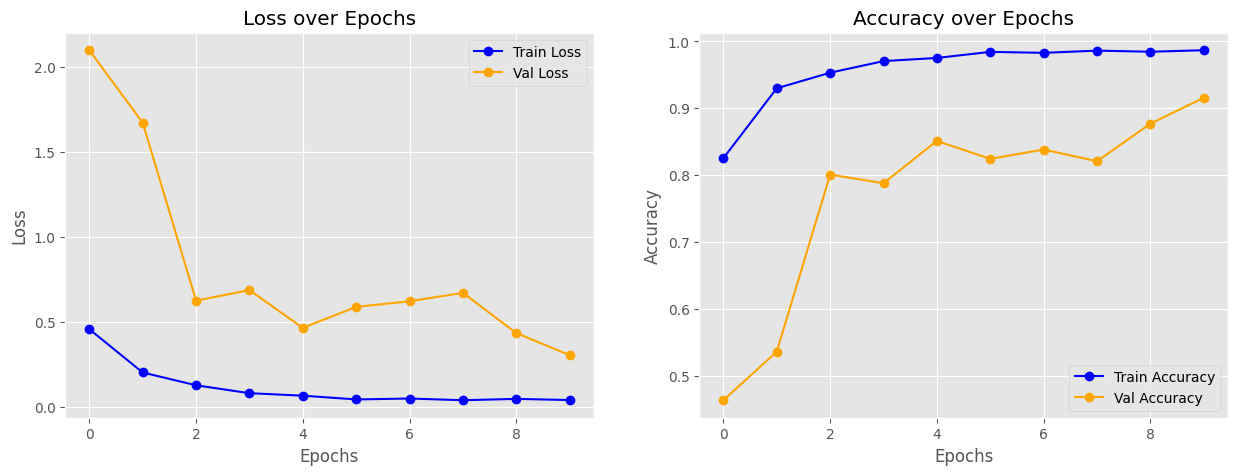

39/41 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

2025-04-14 15:42:22.449539: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1152', 16 bytes spill stores, 16 bytes spill loads

2025-04-14 15:42:22.486272: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1152_0', 344 bytes spill stores, 520 bytes spill loads

2025-04-14 15:42:22.677832: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1152', 212 bytes spill stores, 212 bytes spill loads



41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step
Classification Report:

              precision    recall  f1-score   support

      glioma       0.95      0.97      0.96       300
  meningioma       0.95      0.92      0.94       306
     notumor       0.99      0.97      0.98       405
   pituitary       0.95      0.99      0.97       300

    accuracy                           0.96      1311
   macro avg       0.96      0.96      0.96      1311
weighted avg       0.97      0.96      0.96      1311



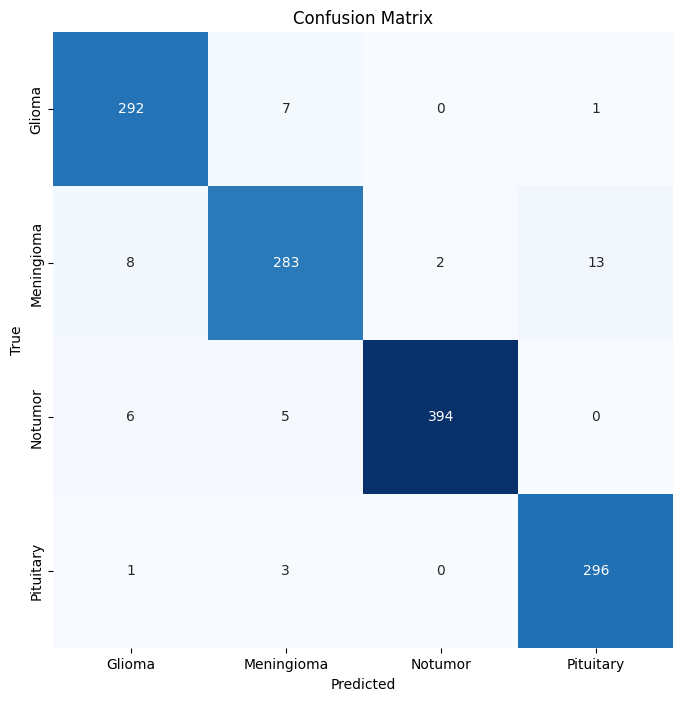

In [28]:
plot_curves(history)

# Ensure the categories are in the correct order based on test_generator.class_indices
ordered_classes = [k for k, v in sorted(test_generator.class_indices.items(), key=lambda item: item[1])]

# Pass the correct ordered_classes to the CM function
confusion_matrix = CM(model=model, test_generator=test_generator, categories=ordered_classes)

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(len(ordered_classes)) + 0.5,
           labels=[name.title() for name in ordered_classes], ha='center')
plt.yticks(ticks=np.arange(len(ordered_classes)) + 0.5,
           labels=[name.title() for name in ordered_classes], va='center')
plt.show()


### DenseNet201

In [29]:
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=input_shape)


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(train_generator, epochs=10, validation_data=val_generator)



74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 96s 1us/step
Epoch 1/10


2025-04-14 15:45:16.008541: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_51000', 16 bytes spill stores, 16 bytes spill loads

2025-04-14 15:45:16.082320: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_51000', 212 bytes spill stores, 212 bytes spill loads

2025-04-14 15:45:16.331250: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_59105', 68 bytes spill stores, 72 bytes spill loads

2025-04-14 15:45:16.712338: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_59105', 8 bytes spill stores, 8 bytes spill loads

2025-04-14 15:45:16.713304: I external/local_xla/xla/str

110/152 ━━━━━━━━━━━━━━━━━━━━ 6s 144ms/step - accuracy: 0.7573 - loss: 0.6431

2025-04-14 15:47:58.885775: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_51000', 12 bytes spill stores, 12 bytes spill loads

2025-04-14 15:47:59.194124: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_59105', 12 bytes spill stores, 16 bytes spill loads

2025-04-14 15:47:59.596647: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_59105', 32 bytes spill stores, 32 bytes spill loads

2025-04-14 15:47:59.776906: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_59105', 8 bytes spill stores, 8 bytes spill loads

2025-04-14 15:47:59.946125: I external/local_xla/xla/strea

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7868 - loss: 0.5681

2025-04-14 15:50:28.008297: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_5424', 12 bytes spill stores, 12 bytes spill loads

2025-04-14 15:50:28.275501: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_5424', 64 bytes spill stores, 64 bytes spill loads



152/152 ━━━━━━━━━━━━━━━━━━━━ 398s 1s/step - accuracy: 0.7874 - loss: 0.5667 - val_accuracy: 0.8901 - val_loss: 0.3228
Epoch 2/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 23s 153ms/step - accuracy: 0.9595 - loss: 0.1207 - val_accuracy: 0.8936 - val_loss: 0.3018
Epoch 3/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 24s 154ms/step - accuracy: 0.9752 - loss: 0.0732 - val_accuracy: 0.9228 - val_loss: 0.3037
Epoch 4/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 24s 155ms/step - accuracy: 0.9800 - loss: 0.0668 - val_accuracy: 0.9439 - val_loss: 0.1856
Epoch 5/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 24s 155ms/step - accuracy: 0.9844 - loss: 0.0465 - val_accuracy: 0.9345 - val_loss: 0.2348
Epoch 6/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 24s 155ms/step - accuracy: 0.9853 - loss: 0.0472 - val_accuracy: 0.9626 - val_loss: 0.1559
Epoch 7/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 24s 155ms/step - accuracy: 0.9936 - loss: 0.0275 - val_accuracy: 0.9626 - val_loss: 0.1645
Epoch 8/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 24s 155ms/step - accuracy: 0.9939 - loss: 0.0173 - val_a

In [30]:
import matplotlib.pyplot as plt

def plot_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    epochs = range(len(loss))

    plt.figure(figsize=(15, 5))
    plt.style.use('ggplot')

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo-', label="Train Loss")
    plt.plot(epochs, val_loss, 'o-', color='orange', label="Val Loss")
    plt.title("Loss over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'bo-', label="Train Accuracy")
    plt.plot(epochs, val_accuracy, 'o-', color='orange', label="Val Accuracy")
    plt.title("Accuracy over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.style.use('default')
    plt.show()


In [31]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

def CM(model, test_generator, categories):
    predictions = model.predict(test_generator)
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = test_generator.classes

    # Confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    print("Classification Report:\n")
    print(classification_report(true_labels, predicted_labels, target_names=categories))

    return cm


In [32]:
def calculate_metrics(confusion_matrix, categories):
    precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
    recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
    f1_score = 2 * (precision * recall) / (precision + recall)
    accuracy = np.sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)

    for i, category in enumerate(categories):
        print(f"Class: {category.title()}")
        print(f"  Precision: {precision[i]:.3f}")
        print(f"  Recall:    {recall[i]:.3f}")
        print(f"  F1-Score:  {f1_score[i]:.3f}\n")

    print(f"Overall Accuracy: {accuracy:.3f}")


In [33]:
import seaborn as sns

def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.xticks(ticks=np.arange(len(classes)) + 0.5,
               labels=[cls.title() for cls in classes], ha='center')
    plt.yticks(ticks=np.arange(len(classes)) + 0.5,
               labels=[cls.title() for cls in classes], va='center')
    plt.show()


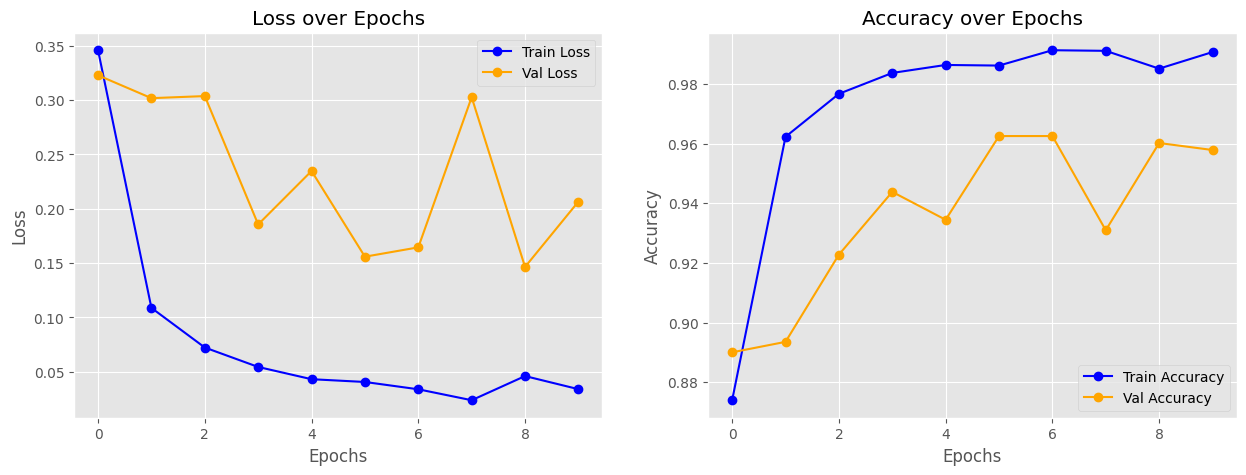

39/41 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

2025-04-14 15:54:34.845894: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_5395', 12 bytes spill stores, 12 bytes spill loads

2025-04-14 15:54:35.018281: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_5395', 196 bytes spill stores, 196 bytes spill loads



41/41 ━━━━━━━━━━━━━━━━━━━━ 35s 557ms/step
Classification Report:

              precision    recall  f1-score   support

      glioma       0.99      0.98      0.99       300
  meningioma       0.99      0.96      0.97       306
     notumor       1.00      1.00      1.00       405
   pituitary       0.96      0.99      0.98       300

    accuracy                           0.98      1311
   macro avg       0.98      0.98      0.98      1311
weighted avg       0.98      0.98      0.98      1311



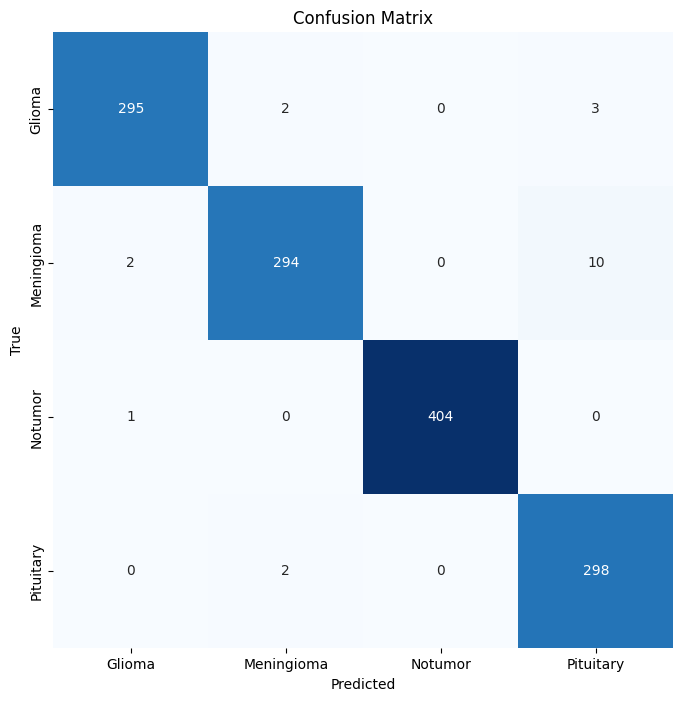

In [34]:
plot_curves(history)

# Ensure the categories are in the correct order based on test_generator.class_indices
ordered_classes = [k for k, v in sorted(test_generator.class_indices.items(), key=lambda item: item[1])]

# Pass the correct ordered_classes to the CM function
confusion_matrix = CM(model=model, test_generator=test_generator, categories=ordered_classes)

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(len(ordered_classes)) + 0.5,
           labels=[name.title() for name in ordered_classes], ha='center')
plt.yticks(ticks=np.arange(len(ordered_classes)) + 0.5,
           labels=[name.title() for name in ordered_classes], va='center')
plt.show()


### EfficientNetB3

In [35]:
base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=input_shape)


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(train_generator, epochs=10, validation_data=val_generator)



Epoch 1/10
139/152 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.6592 - loss: 0.8227

E0000 00:00:1744626396.810955    2807 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1744626396.940883    2807 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1744626397.099991    2807 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1744626397.230276    2807 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1744626397.389660    2807 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:0

152/152 ━━━━━━━━━━━━━━━━━━━━ 141s 439ms/step - accuracy: 0.6719 - loss: 0.7968 - val_accuracy: 0.2772 - val_loss: 1.6695
Epoch 2/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 18s 119ms/step - accuracy: 0.9111 - loss: 0.2539 - val_accuracy: 0.2865 - val_loss: 1.6709
Epoch 3/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 18s 118ms/step - accuracy: 0.9499 - loss: 0.1521 - val_accuracy: 0.4175 - val_loss: 1.7018
Epoch 4/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 19s 121ms/step - accuracy: 0.9643 - loss: 0.1083 - val_accuracy: 0.2982 - val_loss: 2.5572
Epoch 5/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 19s 122ms/step - accuracy: 0.9732 - loss: 0.0896 - val_accuracy: 0.4433 - val_loss: 1.4296
Epoch 6/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 19s 122ms/step - accuracy: 0.9742 - loss: 0.0682 - val_accuracy: 0.3754 - val_loss: 1.8391
Epoch 7/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 19s 121ms/step - accuracy: 0.9811 - loss: 0.0508 - val_accuracy: 0.2830 - val_loss: 1.9055
Epoch 8/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 19s 124ms/step - accuracy: 0.9846 - loss: 0.0529 - va

In [36]:
import matplotlib.pyplot as plt

def plot_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    epochs = range(len(loss))

    plt.figure(figsize=(15, 5))
    plt.style.use('ggplot')

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo-', label="Train Loss")
    plt.plot(epochs, val_loss, 'o-', color='orange', label="Val Loss")
    plt.title("Loss over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'bo-', label="Train Accuracy")
    plt.plot(epochs, val_accuracy, 'o-', color='orange', label="Val Accuracy")
    plt.title("Accuracy over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.style.use('default')
    plt.show()


In [37]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

def CM(model, test_generator, categories):
    predictions = model.predict(test_generator)
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = test_generator.classes

    # Confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    print("Classification Report:\n")
    print(classification_report(true_labels, predicted_labels, target_names=categories))

    return cm


In [38]:
def calculate_metrics(confusion_matrix, categories):
    precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
    recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
    f1_score = 2 * (precision * recall) / (precision + recall)
    accuracy = np.sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)

    for i, category in enumerate(categories):
        print(f"Class: {category.title()}")
        print(f"  Precision: {precision[i]:.3f}")
        print(f"  Recall:    {recall[i]:.3f}")
        print(f"  F1-Score:  {f1_score[i]:.3f}\n")

    print(f"Overall Accuracy: {accuracy:.3f}")


In [39]:
import seaborn as sns

def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.xticks(ticks=np.arange(len(classes)) + 0.5,
               labels=[cls.title() for cls in classes], ha='center')
    plt.yticks(ticks=np.arange(len(classes)) + 0.5,
               labels=[cls.title() for cls in classes], va='center')
    plt.show()


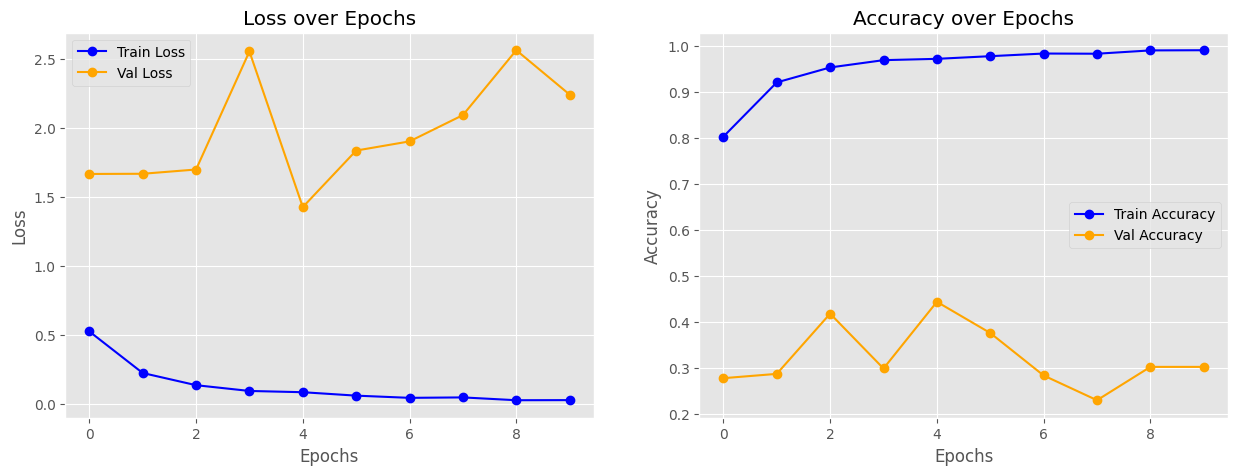

41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 234ms/step
Classification Report:

              precision    recall  f1-score   support

      glioma       0.39      0.27      0.32       300
  meningioma       0.37      0.41      0.39       306
     notumor       0.49      0.94      0.65       405
   pituitary       0.00      0.00      0.00       300

    accuracy                           0.45      1311
   macro avg       0.31      0.40      0.34      1311
weighted avg       0.33      0.45      0.36      1311



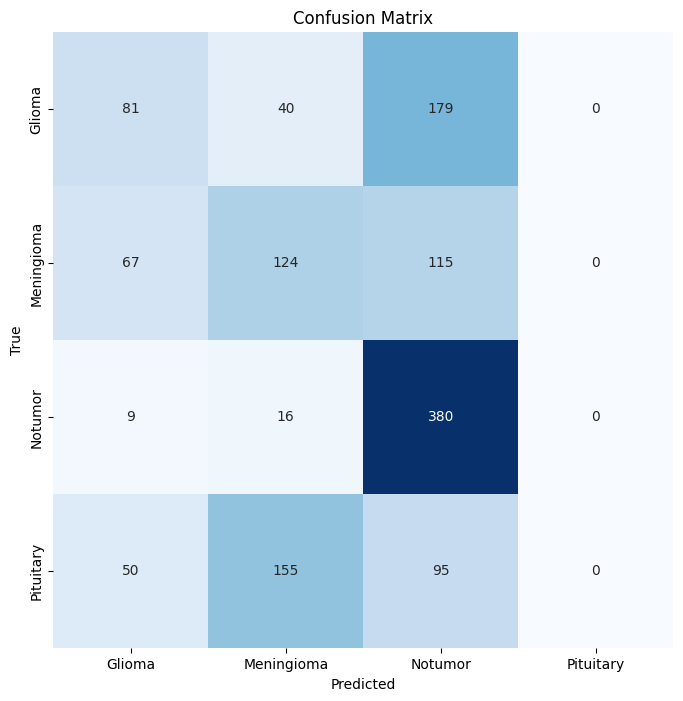

In [40]:
plot_curves(history)

# Ensure the categories are in the correct order based on test_generator.class_indices
ordered_classes = [k for k, v in sorted(test_generator.class_indices.items(), key=lambda item: item[1])]

# Pass the correct ordered_classes to the CM function
confusion_matrix = CM(model=model, test_generator=test_generator, categories=ordered_classes)

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(len(ordered_classes)) + 0.5,
           labels=[name.title() for name in ordered_classes], ha='center')
plt.yticks(ticks=np.arange(len(ordered_classes)) + 0.5,
           labels=[name.title() for name in ordered_classes], va='center')
plt.show()
